In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import lightgbm as lgb
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import gc

/Users/k17099kk/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [53]:
sanren_odds = pd.read_csv("/Users/k17099kk/bigdata/keiba_data/odds_sanrenpuku.csv",)
umatan_odds = pd.read_csv("/Users/k17099kk/bigdata/keiba_data/odds_uma_tan.csv")
sanren_harai = pd.read_csv("/Users/k17099kk/bigdata/keiba_data/harai_sanrenpuku.csv")
#umatan_harai = pd.read_csv("/Users/k17099kk/bigdata/keiba_data/harai_umatan.csv")

In [4]:
gc.collect()

27

In [5]:
sanren_odds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15926 entries, 0 to 15925
Columns: 816 entries, rank_1_sanrenpuku to rank_816_sanrenpuku
dtypes: float64(812), int64(4)
memory usage: 99.1 MB


In [6]:
umatan_odds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15926 entries, 0 to 15925
Columns: 306 entries, rank_1_umatan to rank_306_umatan
dtypes: float64(305), int64(1)
memory usage: 37.2 MB


In [54]:
odds = pd.concat([sanren_odds, umatan_odds], axis=1)

In [55]:
data = pd.concat([sanren_harai, odds], axis=1)

In [15]:
data

,target_harai,target_rank,rank_1_sanrenpuku,rank_2_sanrenpuku,rank_3_sanrenpuku,rank_4_sanrenpuku,rank_5_sanrenpuku,rank_6_sanrenpuku,rank_7_sanrenpuku,rank_8_sanrenpuku,rank_9_sanrenpuku,rank_10_sanrenpuku,rank_11_sanrenpuku,rank_12_sanrenpuku,rank_13_sanrenpuku,rank_14_sanrenpuku,rank_15_sanrenpuku,rank_16_sanrenpuku,rank_17_sanrenpuku,rank_18_sanrenpuku,rank_19_sanrenpuku,rank_20_sanrenpuku,rank_21_sanrenpuku,rank_22_sanrenpuku,rank_23_sanrenpuku,...,rank_282_umatan,rank_283_umatan,rank_284_umatan,rank_285_umatan,rank_286_umatan,rank_287_umatan,rank_288_umatan,rank_289_umatan,rank_290_umatan,rank_291_umatan,rank_292_umatan,rank_293_umatan,rank_294_umatan,rank_295_umatan,rank_296_umatan,rank_297_umatan,rank_298_umatan,rank_299_umatan,rank_300_umatan,rank_301_umatan,rank_302_umatan,rank_303_umatan,rank_304_umatan,rank_305_umatan,rank_306_umatan
0,7070,22,145,148,185.0,205,222.0,252.0,258.0,259.0,262,319.0,319.0,327.0,354.0,468.0,482.0,534.0,537.0,558.0,592.0,634.0,671.0,707.0,714.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1600,4,105,115,120.0,160,191.0,198.0,244.0,274.0,287,292.0,335.0,362.0,380.0,446.0,488.0,532.0,536.0,582.0,654.0,677.0,755.0,784.0,846.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4160,11,97,127,131.0,139,142.0,215.0,239.0,364.0,368,411.0,416.0,424.0,427.0,478.0,489.0,546.0,551.0,568.0,575.0,593.0,597.0,654.0,660.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3050,9,117,120,121.0,143,211.0,286.0,295.0,300.0,305,305.0,311.0,329.0,357.0,365.0,382.0,386.0,398.0,413.0,416.0,465.0,543.0,550.0,578.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11910,37,97,131,142.0,188,216.0,224.0,237.0,327.0,330,336.0,413.0,419.0,447.0,448.0,450.0,462.0,481.0,555.0,566.0,602.0,605.0,632.0,652.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1080,2,94,108,118.0,225,250.0,276.0,310.0,326.0,345,389.0,418.0,431.0,455.0,693.0,741.0,757.0,768.0,803.0,825.0,852.0,873.0,877.0,906.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5940,21,164,226,234.0,246,294.0,317.0,330.0,335.0,389,408.0,444.0,458.0,507.0,517.0,518.0,545.0,559.0,562.0,566.0,570.0,594.0,600.0,610.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,6140,14,166,179,198.0,229,248.0,264.0,286.0,291.0,310,333.0,487.0,565.0,612.0,614.0,648.0,662.0,674.0,680.0,714.0,741.0,789.0,817.0,847.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,68980,162,170,179,195.0,276,335.0,340.0,340.0,361.0,367,401.0,413.0,455.0,538.0,589.0,646.0,653.0,670.0,678.0,690.0,700.0,704.0,719.0,720.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1050,3,60,60,105.0,130,144.0,195.0,207.0,270.0,273,290.0,319.0,338.0,345.0,355.0,359.0,385.0,440.0,441.0,498.0,596.0,646.0,668.0,675.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
data['manba_flag'] = data['target_harai'].apply(lambda x : 1 if x >= 10000 else 0)

In [57]:
X = data.drop(['target_harai', 'target_rank', 'manba_flag'],axis=1)
y = data['manba_flag']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,)

In [59]:
train = pd.concat([y_train, X_train], axis=1)

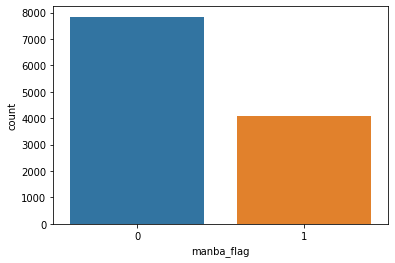

In [20]:
sns.countplot(y_train)

In [21]:
X_train.columns

Index(['rank_1_sanrenpuku', 'rank_2_sanrenpuku', 'rank_3_sanrenpuku',
       'rank_4_sanrenpuku', 'rank_5_sanrenpuku', 'rank_6_sanrenpuku',
       'rank_7_sanrenpuku', 'rank_8_sanrenpuku', 'rank_9_sanrenpuku',
       'rank_10_sanrenpuku',
       ...
       'rank_297_umatan', 'rank_298_umatan', 'rank_299_umatan',
       'rank_300_umatan', 'rank_301_umatan', 'rank_302_umatan',
       'rank_303_umatan', 'rank_304_umatan', 'rank_305_umatan',
       'rank_306_umatan'],
      dtype='object', length=1122)

In [22]:
X_train.describe()

,rank_1_sanrenpuku,rank_2_sanrenpuku,rank_3_sanrenpuku,rank_4_sanrenpuku,rank_5_sanrenpuku,rank_6_sanrenpuku,rank_7_sanrenpuku,rank_8_sanrenpuku,rank_9_sanrenpuku,rank_10_sanrenpuku,rank_11_sanrenpuku,rank_12_sanrenpuku,rank_13_sanrenpuku,rank_14_sanrenpuku,rank_15_sanrenpuku,rank_16_sanrenpuku,rank_17_sanrenpuku,rank_18_sanrenpuku,rank_19_sanrenpuku,rank_20_sanrenpuku,rank_21_sanrenpuku,rank_22_sanrenpuku,rank_23_sanrenpuku,rank_24_sanrenpuku,rank_25_sanrenpuku,...,rank_282_umatan,rank_283_umatan,rank_284_umatan,rank_285_umatan,rank_286_umatan,rank_287_umatan,rank_288_umatan,rank_289_umatan,rank_290_umatan,rank_291_umatan,rank_292_umatan,rank_293_umatan,rank_294_umatan,rank_295_umatan,rank_296_umatan,rank_297_umatan,rank_298_umatan,rank_299_umatan,rank_300_umatan,rank_301_umatan,rank_302_umatan,rank_303_umatan,rank_304_umatan,rank_305_umatan,rank_306_umatan
count,11944.000000,11944.000000,11943.000000,11944.000000,11942.000000,11942.000000,11942.000000,11937.000000,11944.000000,11942.000000,11930.000000,11928.000000,11929.000000,11925.000000,11927.000000,11923.000000,11931.000000,11918.000000,11927.000000,11921.000000,11884.000000,11882.000000,11885.000000,11889.000000,11882.000000,...,511.000000,501.000000,509.000000,521.000000,535.000000,512.000000,484.000000,519.000000,510.000000,518.000000,538.000000,529.000000,506.000000,538.000000,539.000000,530.000000,520.000000,570.000000,552.000000,575.000000,574.000000,575.000000,649.000000,632.000000,696.000000
mean,120.094859,156.959478,182.652097,213.883456,242.494306,269.813432,297.318958,324.268996,349.920881,376.122090,405.250293,432.468729,459.817755,487.429015,515.551270,544.583410,574.418825,604.246350,634.650122,665.997232,696.626136,728.775122,761.923096,795.861384,829.136846,...,79306.663405,81723.540918,85017.569745,91901.153551,88683.738318,95713.693359,91281.859504,97511.522158,98731.188235,102811.488417,108565.323420,113293.612476,115065.195652,119316.611524,125939.365492,130826.688679,136464.190385,149868.210526,161666.293478,167352.415652,174816.872822,200608.831304,231218.687211,266465.931962,308110.153736
std,62.340540,69.066965,73.033329,76.074345,79.534178,81.366446,83.114261,84.442451,85.852475,87.292153,88.358390,90.111551,91.803552,93.435239,95.485824,97.829685,101.853246,107.167065,112.056111,118.804589,120.353726,128.613623,139.510924,151.836429,162.313816,...,51000.151801,49492.763890,51432.993249,62572.572617,55836.240365,65929.928352,60189.969762,61224.907897,60987.178268,69186.374450,71295.499963,76514.905859,78424.635933,78355.059378,86723.077402,93251.727647,92998.484369,108836.437631,123922.642598,124522.523022,135219.859062,161149.290184,192448.152694,220180.703163,255370.534088
min,11.000000,24.000000,35.000000,54.000000,74.000000,81.000000,123.000000,125.000000,147.000000,158.000000,183.000000,188.000000,196.000000,209.000000,228.000000,239.000000,242.000000,244.000000,283.000000,305.000000,379.000000,388.000000,409.000000,432.000000,433.000000,...,16810.000000,16835.000000,16960.000000,17036.000000,17268.000000,17453.000000,17506.000000,20188.000000,17724.000000,18712.000000,21490.000000,19087.000000,19151.000000,19920.000000,21993.000000,26945.000000,22207.000000,22513.000000,23583.000000,25941.000000,28183.000000,29118.000000,0.000000,31879.000000,0.000000
25%,76.000000,108.000000,131.000000,160.000000,187.000000,212.000000,239.000000,266.000000,291.000000,316.000000,344.000000,371.000000,397.000000,425.000000,451.000000,480.000000,509.000000,537.000000,565.000000,593.000000,622.000000,651.000000,679.000000,709.000000,738.000000,...,45511.500000,47971.000000,49487.000000,50150.000000,50316.000000,52418.000000,51295.750000,54179.500000,54856.750000,56544.500000,59417.750000,62426.000000,61657.500000,65075.000000,66941.500000,70487.000000,75683.750000,78945.750000,79135.250000,85267.500000,88847.000000,97753.000000,106700.000000,117964.750000,131966.250000
50%,109.000000,146.000000,170.000000,201.000000,228.000000,256.000000,285.000000,311.00000

In [23]:
X_train.isnull().sum()

rank_1_sanrenpuku         0
rank_2_sanrenpuku         0
rank_3_sanrenpuku         1
rank_4_sanrenpuku         0
rank_5_sanrenpuku         2
rank_6_sanrenpuku         2
rank_7_sanrenpuku         2
rank_8_sanrenpuku         7
rank_9_sanrenpuku         0
rank_10_sanrenpuku        2
rank_11_sanrenpuku       14
rank_12_sanrenpuku       16
rank_13_sanrenpuku       15
rank_14_sanrenpuku       19
rank_15_sanrenpuku       17
rank_16_sanrenpuku       21
rank_17_sanrenpuku       13
rank_18_sanrenpuku       26
rank_19_sanrenpuku       17
rank_20_sanrenpuku       23
rank_21_sanrenpuku       60
rank_22_sanrenpuku       62
rank_23_sanrenpuku       59
rank_24_sanrenpuku       55
rank_25_sanrenpuku       62
                      ...  
rank_282_umatan       11433
rank_283_umatan       11443
rank_284_umatan       11435
rank_285_umatan       11423
rank_286_umatan       11409
rank_287_umatan       11432
rank_288_umatan       11460
rank_289_umatan       11425
rank_290_umatan       11434
rank_291_umatan     

In [60]:
param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.4,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 0.05,
    'learning_rate': 0.01,
    'max_depth': -1,  
    'metric':'auc',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective': 'binary', 
    'verbosity': 1
}

In [61]:
train_df = train
test_df = X_test
target = y_train
features = [c for c in train.columns if c not in ['manba_flag']]

In [74]:
folds = StratifiedKFold(n_splits=10, shuffle=False, random_state=44000)
oof = np.zeros(len(train_df))
predictions = np.zeros(len(test_df))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(train_df.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train_df.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 100000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=300, early_stopping_rounds = 1000)
    oof[val_idx] = clf.predict(train_df.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test_df[features], num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))

Fold 0
Training until validation scores don't improve for 1000 rounds.
[300]	training's auc: 0.752669	valid_1's auc: 0.687046
[600]	training's auc: 0.788661	valid_1's auc: 0.686752
[900]	training's auc: 0.821312	valid_1's auc: 0.689006
[1200]	training's auc: 0.846441	valid_1's auc: 0.688762
[1500]	training's auc: 0.870733	valid_1's auc: 0.6899
[1800]	training's auc: 0.889052	valid_1's auc: 0.690521
[2100]	training's auc: 0.90589	valid_1's auc: 0.688378
[2400]	training's auc: 0.919447	valid_1's auc: 0.686159
[2700]	training's auc: 0.931334	valid_1's auc: 0.686131
Early stopping, best iteration is:
[1801]	training's auc: 0.889097	valid_1's auc: 0.690584
Fold 1
Training until validation scores don't improve for 1000 rounds.
[300]	training's auc: 0.752836	valid_1's auc: 0.671449
[600]	training's auc: 0.788037	valid_1's auc: 0.671686
[900]	training's auc: 0.820238	valid_1's auc: 0.668853
Early stopping, best iteration is:
[56]	training's auc: 0.725789	valid_1's auc: 0.67767
Fold 2
Training 

/Users/k17099kk/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


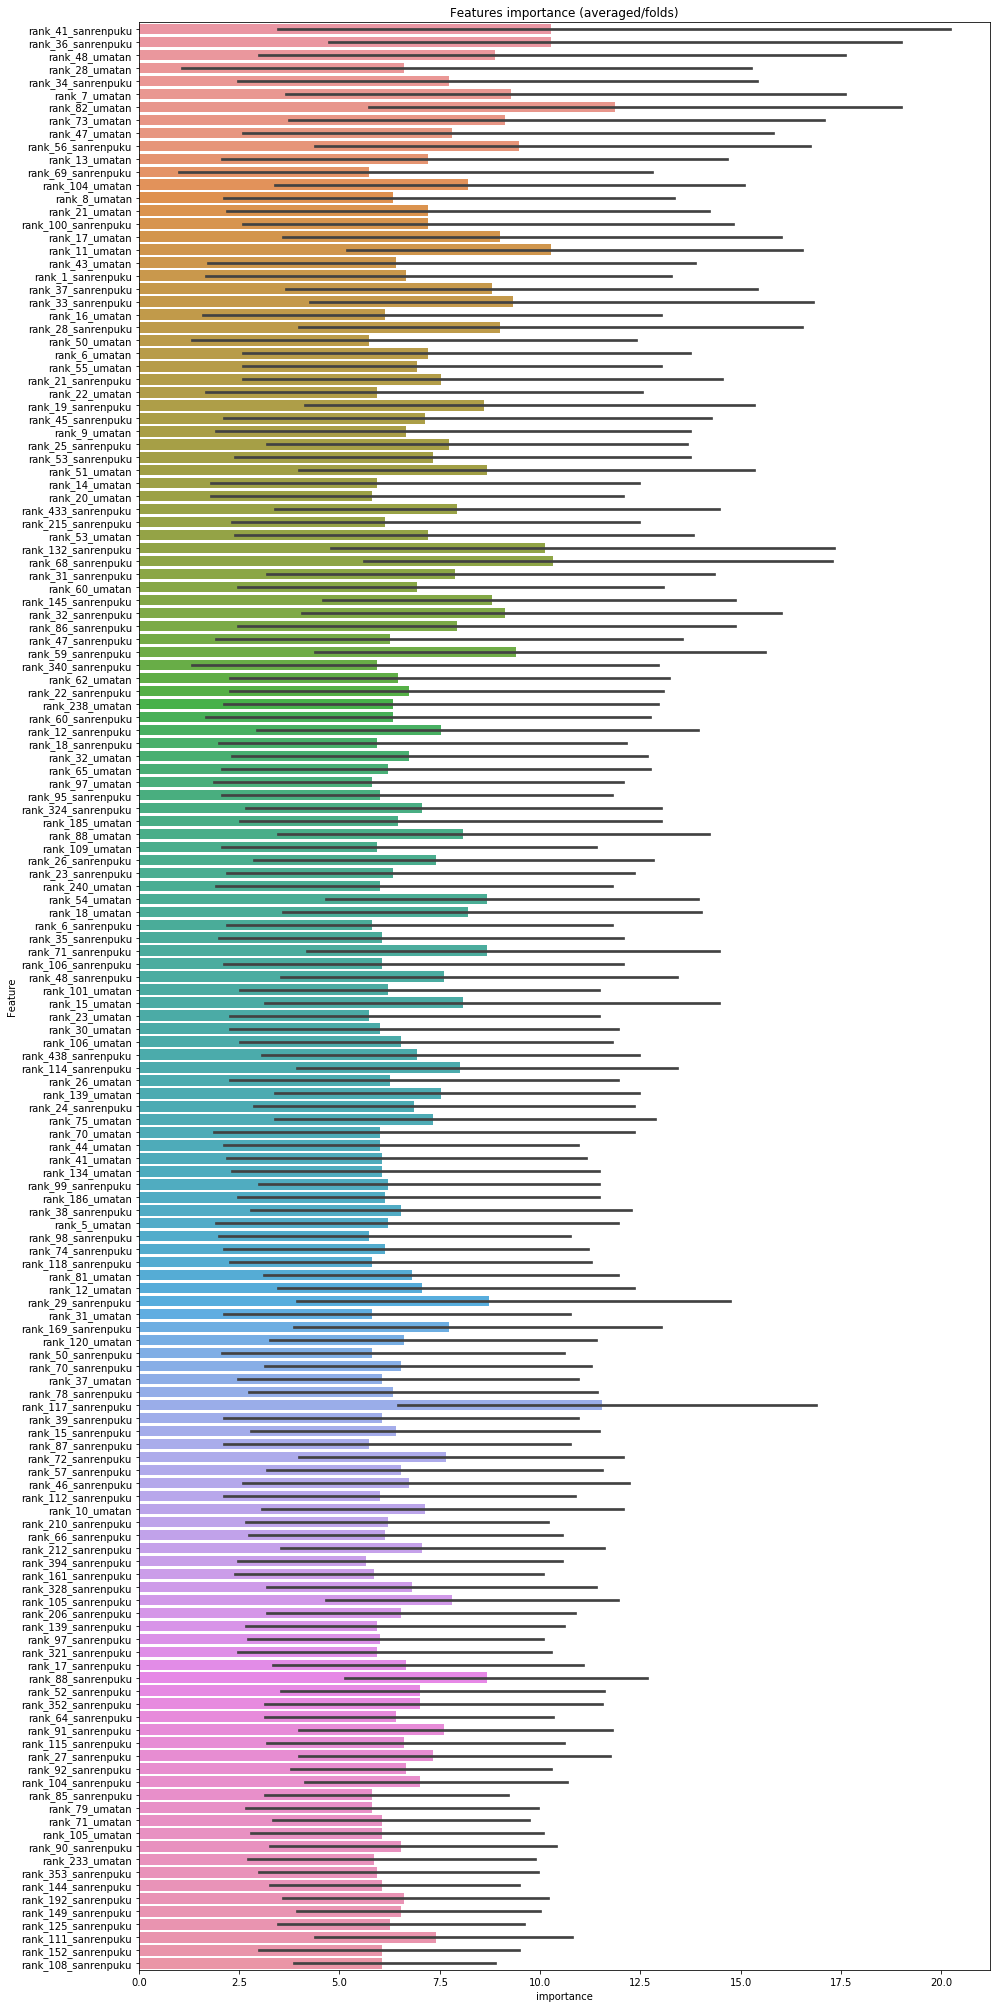

In [75]:
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:150].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(14,28))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()
plt.savefig('FI.png')

In [12]:
# 3連複データを300までにする
c = train_df.columns[301:817]
train_df.drop(c, axis=1, inplace=True)
test_df.drop(c, axis=1, inplace=True)

/Users/k17099kk/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [27]:
sanren_odds.isnull().sum()

rank_1_sanrenpuku          0
rank_2_sanrenpuku          0
rank_3_sanrenpuku          1
rank_4_sanrenpuku          0
rank_5_sanrenpuku          2
rank_6_sanrenpuku          3
rank_7_sanrenpuku          3
rank_8_sanrenpuku          8
rank_9_sanrenpuku          0
rank_10_sanrenpuku         2
rank_11_sanrenpuku        21
rank_12_sanrenpuku        18
rank_13_sanrenpuku        17
rank_14_sanrenpuku        24
rank_15_sanrenpuku        23
rank_16_sanrenpuku        24
rank_17_sanrenpuku        16
rank_18_sanrenpuku        34
rank_19_sanrenpuku        26
rank_20_sanrenpuku        33
rank_21_sanrenpuku        78
rank_22_sanrenpuku        82
rank_23_sanrenpuku        78
rank_24_sanrenpuku        74
rank_25_sanrenpuku        82
                       ...  
rank_792_sanrenpuku    15527
rank_793_sanrenpuku    15558
rank_794_sanrenpuku    15506
rank_795_sanrenpuku    15543
rank_796_sanrenpuku    15519
rank_797_sanrenpuku    15514
rank_798_sanrenpuku    15539
rank_799_sanrenpuku    15509
rank_800_sanre

In [28]:
umatan_odds.isnull().sum()

rank_1_umatan          0
rank_2_umatan          1
rank_3_umatan          2
rank_4_umatan          4
rank_5_umatan          2
rank_6_umatan         12
rank_7_umatan          6
rank_8_umatan          9
rank_9_umatan         11
rank_10_umatan        15
rank_11_umatan        11
rank_12_umatan         9
rank_13_umatan        22
rank_14_umatan        18
rank_15_umatan        19
rank_16_umatan        23
rank_17_umatan        26
rank_18_umatan        27
rank_19_umatan        25
rank_20_umatan        43
rank_21_umatan        54
rank_22_umatan        55
rank_23_umatan        45
rank_24_umatan        56
rank_25_umatan        58
                   ...  
rank_282_umatan    15260
rank_283_umatan    15238
rank_284_umatan    15247
rank_285_umatan    15236
rank_286_umatan    15216
rank_287_umatan    15248
rank_288_umatan    15267
rank_289_umatan    15223
rank_290_umatan    15226
rank_291_umatan    15221
rank_292_umatan    15216
rank_293_umatan    15223
rank_294_umatan    15220
rank_295_umatan    15205


In [29]:
l = []
for index, value in umatan_odds.isnull().sum().iteritems():
    if value < 7975:
        l.append(index)
l

['rank_1_umatan',
 'rank_2_umatan',
 'rank_3_umatan',
 'rank_4_umatan',
 'rank_5_umatan',
 'rank_6_umatan',
 'rank_7_umatan',
 'rank_8_umatan',
 'rank_9_umatan',
 'rank_10_umatan',
 'rank_11_umatan',
 'rank_12_umatan',
 'rank_13_umatan',
 'rank_14_umatan',
 'rank_15_umatan',
 'rank_16_umatan',
 'rank_17_umatan',
 'rank_18_umatan',
 'rank_19_umatan',
 'rank_20_umatan',
 'rank_21_umatan',
 'rank_22_umatan',
 'rank_23_umatan',
 'rank_24_umatan',
 'rank_25_umatan',
 'rank_26_umatan',
 'rank_27_umatan',
 'rank_28_umatan',
 'rank_29_umatan',
 'rank_30_umatan',
 'rank_31_umatan',
 'rank_32_umatan',
 'rank_33_umatan',
 'rank_34_umatan',
 'rank_35_umatan',
 'rank_36_umatan',
 'rank_37_umatan',
 'rank_38_umatan',
 'rank_39_umatan',
 'rank_40_umatan',
 'rank_41_umatan',
 'rank_42_umatan',
 'rank_43_umatan',
 'rank_44_umatan',
 'rank_45_umatan',
 'rank_46_umatan',
 'rank_47_umatan',
 'rank_48_umatan',
 'rank_49_umatan',
 'rank_50_umatan',
 'rank_51_umatan',
 'rank_52_umatan',
 'rank_53_umatan',
 '

In [15]:
#馬単のカラムは200位までにする
c = train_df.columns[501:607]
train_df.drop(c, axis=1, inplace=True)
test_df.drop(c, axis=1, inplace=True)

/Users/k17099kk/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [31]:
train_df.head()

,manba_flag,rank_1_sanrenpuku,rank_2_sanrenpuku,rank_3_sanrenpuku,rank_4_sanrenpuku,rank_5_sanrenpuku,rank_6_sanrenpuku,rank_7_sanrenpuku,rank_8_sanrenpuku,rank_9_sanrenpuku,rank_10_sanrenpuku,rank_11_sanrenpuku,rank_12_sanrenpuku,rank_13_sanrenpuku,rank_14_sanrenpuku,rank_15_sanrenpuku,rank_16_sanrenpuku,rank_17_sanrenpuku,rank_18_sanrenpuku,rank_19_sanrenpuku,rank_20_sanrenpuku,rank_21_sanrenpuku,rank_22_sanrenpuku,rank_23_sanrenpuku,rank_24_sanrenpuku,...,rank_176_umatan,rank_177_umatan,rank_178_umatan,rank_179_umatan,rank_180_umatan,rank_181_umatan,rank_182_umatan,rank_183_umatan,rank_184_umatan,rank_185_umatan,rank_186_umatan,rank_187_umatan,rank_188_umatan,rank_189_umatan,rank_190_umatan,rank_191_umatan,rank_192_umatan,rank_193_umatan,rank_194_umatan,rank_195_umatan,rank_196_umatan,rank_197_umatan,rank_198_umatan,rank_199_umatan,rank_200_umatan
13882,0,53,74,79.0,128,339.0,348.0,376.0,376.0,400,411.0,416.0,440.0,455.0,480.0,482.0,484.0,540.0,546.0,730.0,740.0,771.0,835.0,846.0,871.0,...,NaN,46980.0,NaN,48426.0,49183.0,NaN,49963.0,NaN,54270.0,NaN,NaN,56209.0,57231.0,59390.0,60532.0,NaN,61719.0,62954.0,65577.0,NaN,66972.0,69949.0,71538.0,NaN,NaN
2727,0,173,228,278.0,320,331.0,334.0,344.0,345.0,378,387.0,403.0,457.0,521.0,526.0,543.0,549.0,605.0,632.0,644.0,649.0,690.0,707.0,775.0,779.0,...,12175.0,12250.0,12325.0,12796.0,12961.0,14049.0,NaN,14148.0,14248.0,14453.0,14992.0,15219.0,15453.0,15695.0,16741.0,17171.0,17319.0,18099.0,18431.0,18775.0,NaN,18952.0,19505.0,20090.0,20293.0
3964,0,86,89,125.0,128,165.0,195.0,199.0,213.0,213,221.0,260.0,281.0,334.0,371.0,401.0,495.0,558.0,762.0,765.0,771.0,823.0,839.0,902.0,1023.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6896,0,103,129,134.0,144,145.0,173.0,237.0,239.0,265,277.0,280.0,297.0,378.0,456.0,480.0,506.0,561.0,568.0,575.0,577.0,676.0,725.0,828.0,880.0,...,66387.0,68090.0,NaN,NaN,NaN,69882.0,71770.0,73764.0,78103.0,80470.0,82984.0,NaN,NaN,NaN,85661.0,NaN,88517.0,NaN,91569.0,NaN,98352.0,102135.0,NaN,NaN,106220.0
10783,1,81,129,149.0,162,180.0,185.0,217.0,288.0,301,324.0,379.0,382.0,398.0,458.0,465.0,539.0,568.0,571.0,592.0,644.0,680.0,685.0,699.0,708.0,...,75213.0,NaN,NaN,78483.0,85958.0,NaN,NaN,90256.0,NaN,95006.0,NaN,120342.0,NaN,NaN,128937.0,NaN,138856.0,NaN,150427.0,NaN,164102.0,180513.0,200570.0,NaN,NaN


In [16]:
features = [c for c in train.columns if c not in ['manba_flag']]

In [308]:
folds = StratifiedKFold(n_splits=8, shuffle=False, random_state=44000)
oof = np.zeros(len(train_df))
predictions = np.zeros(len(test_df))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(train_df.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train_df.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 100000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=300, early_stopping_rounds = 1000)
    oof[val_idx] = clf.predict(train_df.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test_df[features], num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))

Fold 0
Training until validation scores don't improve for 1000 rounds.
[300]	training's auc: 0.753603	valid_1's auc: 0.67652
[600]	training's auc: 0.788705	valid_1's auc: 0.673323
[900]	training's auc: 0.818707	valid_1's auc: 0.673935
[1200]	training's auc: 0.844146	valid_1's auc: 0.67322
Early stopping, best iteration is:
[327]	training's auc: 0.756408	valid_1's auc: 0.676723
Fold 1
Training until validation scores don't improve for 1000 rounds.
[300]	training's auc: 0.747848	valid_1's auc: 0.727014
[600]	training's auc: 0.784694	valid_1's auc: 0.723163
[900]	training's auc: 0.815343	valid_1's auc: 0.719624
Early stopping, best iteration is:
[128]	training's auc: 0.72788	valid_1's auc: 0.728195
Fold 2
Training until validation scores don't improve for 1000 rounds.
[300]	training's auc: 0.749068	valid_1's auc: 0.702628
[600]	training's auc: 0.783009	valid_1's auc: 0.70216
[900]	training's auc: 0.814831	valid_1's auc: 0.700173
Early stopping, best iteration is:
[84]	training's auc: 0.72

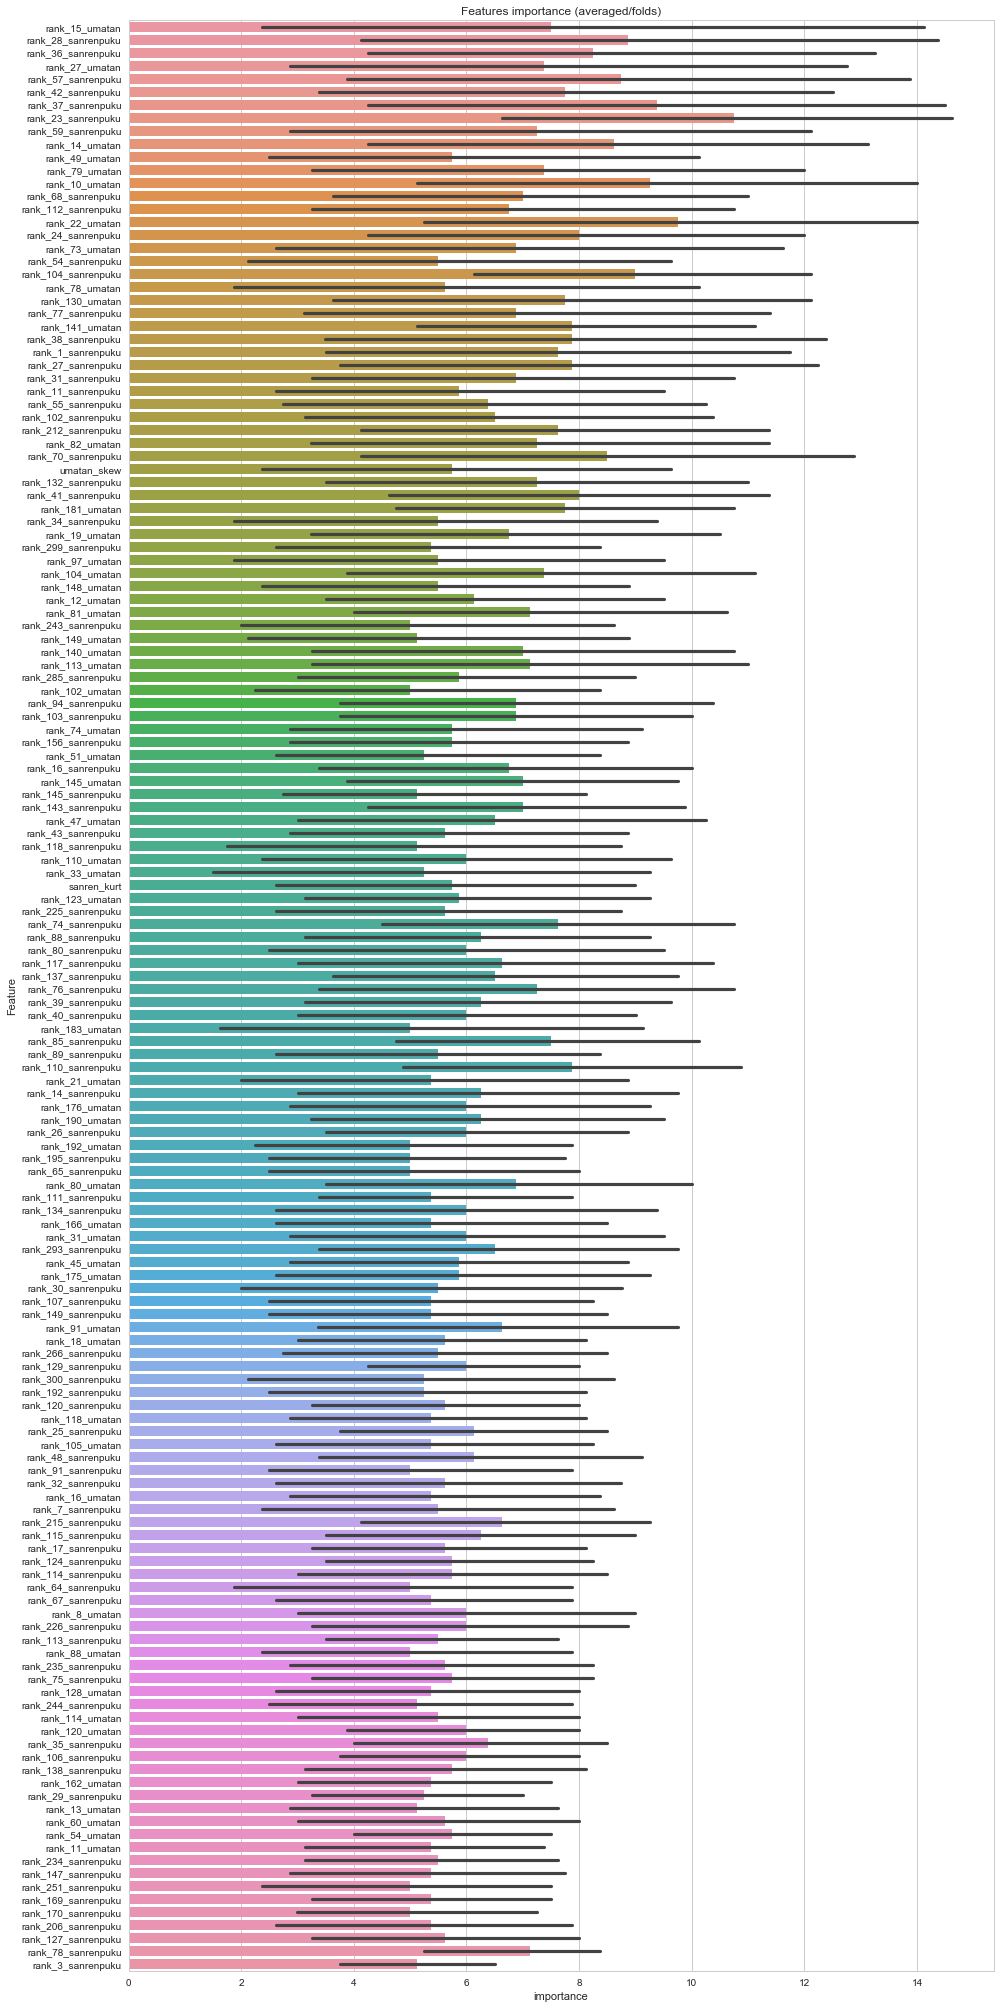

In [310]:
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:150].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(14,28))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()
#plt.savefig('FI.png')

In [33]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(10,10,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();

/Users/k17099kk/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/k17099kk/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


<Figure size 432x288 with 0 Axes>

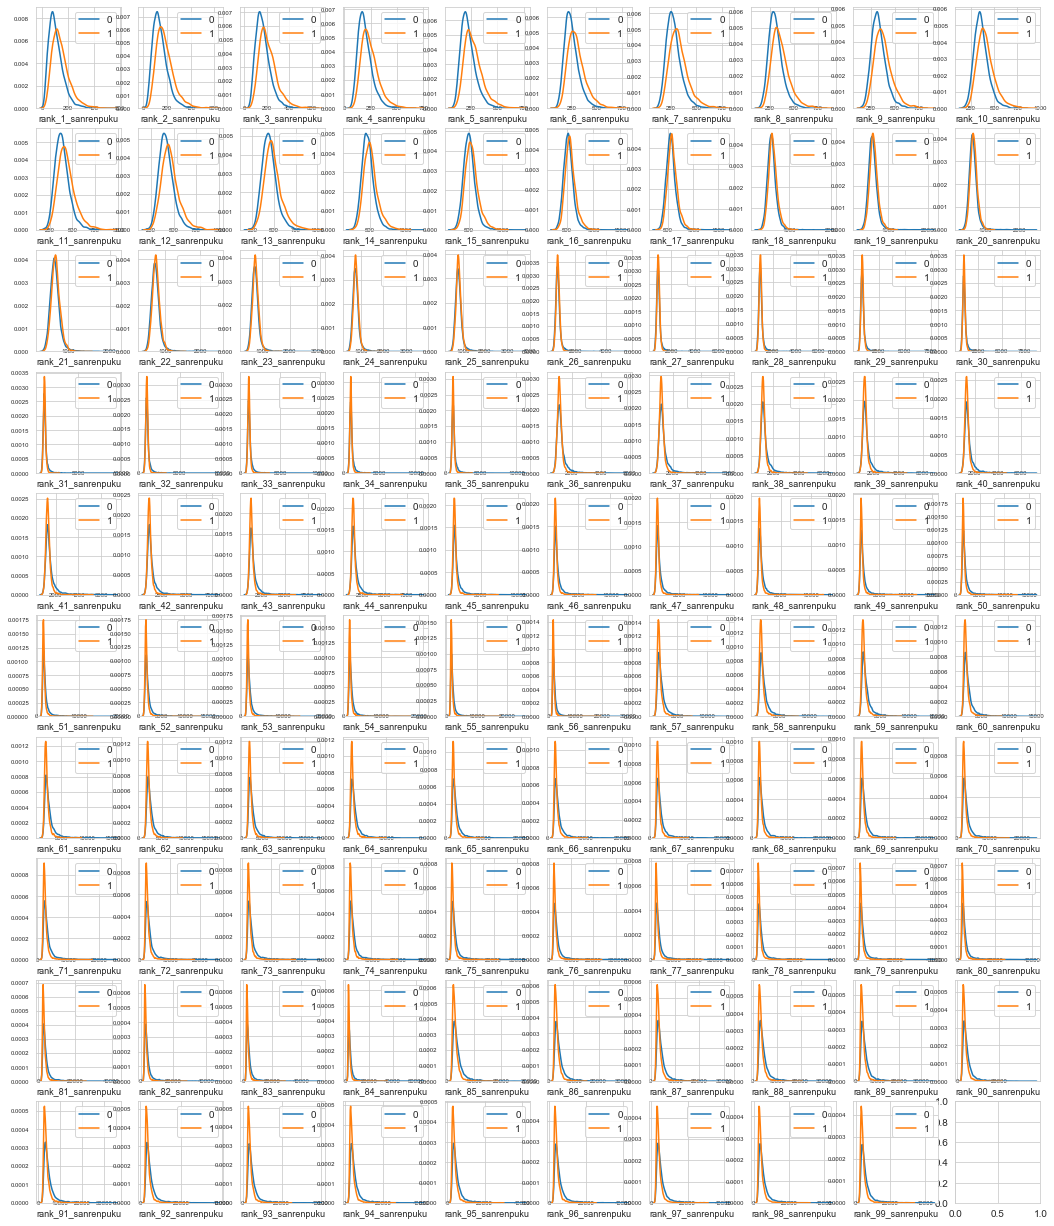

In [34]:
t0 = train_df.loc[train_df['manba_flag'] == 0]
t1 = train_df.loc[train_df['manba_flag'] == 1]
features = train_df.columns.values[1:100]
plot_feature_distribution(t0, t1, '0', '1', features)

<Figure size 432x288 with 0 Axes>

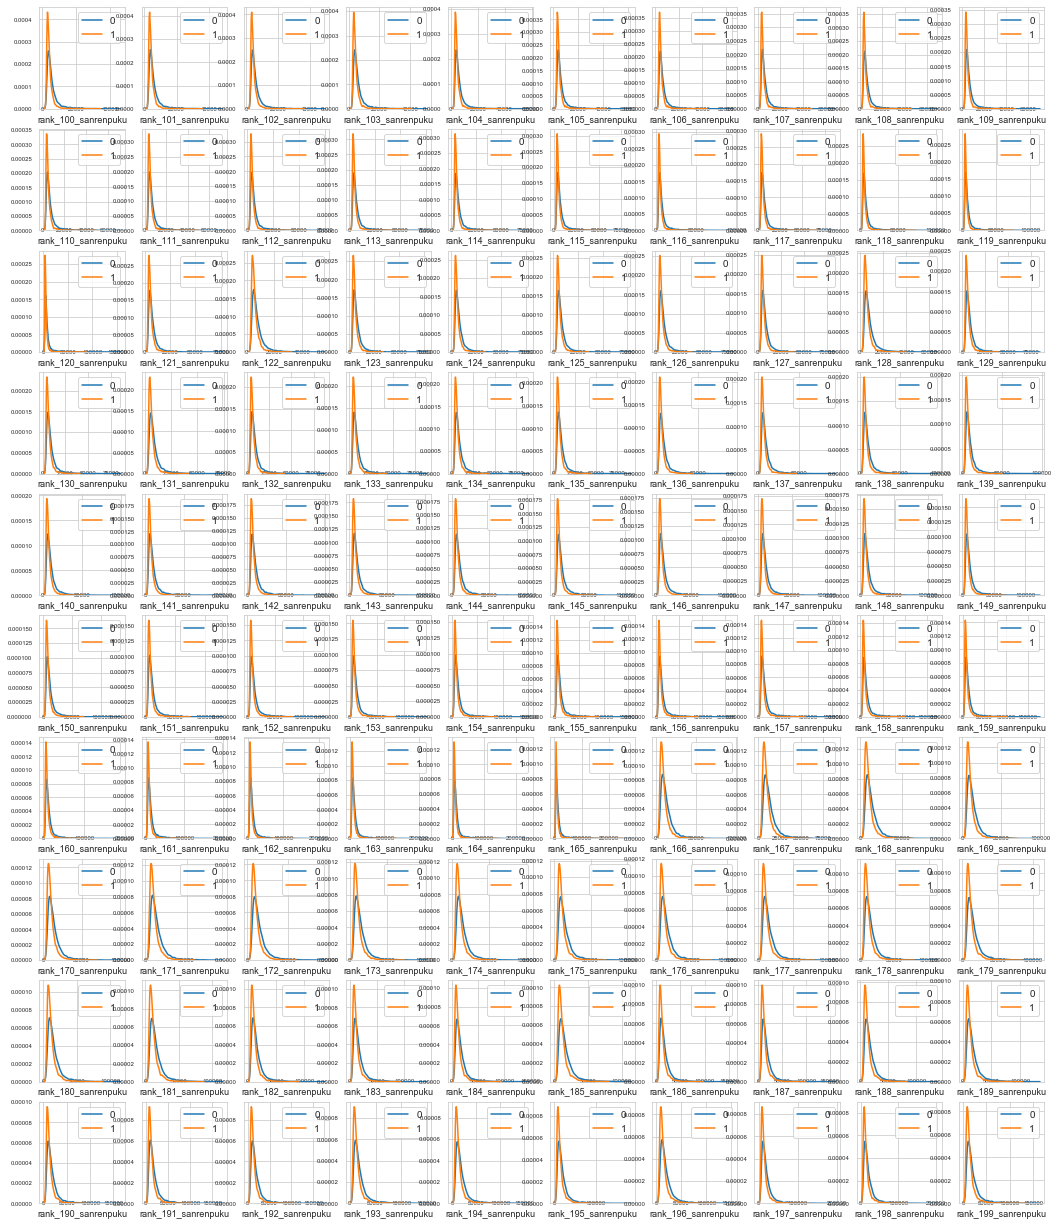

In [35]:
t0 = train_df.loc[train_df['manba_flag'] == 0]
t1 = train_df.loc[train_df['manba_flag'] == 1]
features = train_df.columns.values[100:200]
plot_feature_distribution(t0, t1, '0', '1', features)

<Figure size 432x288 with 0 Axes>

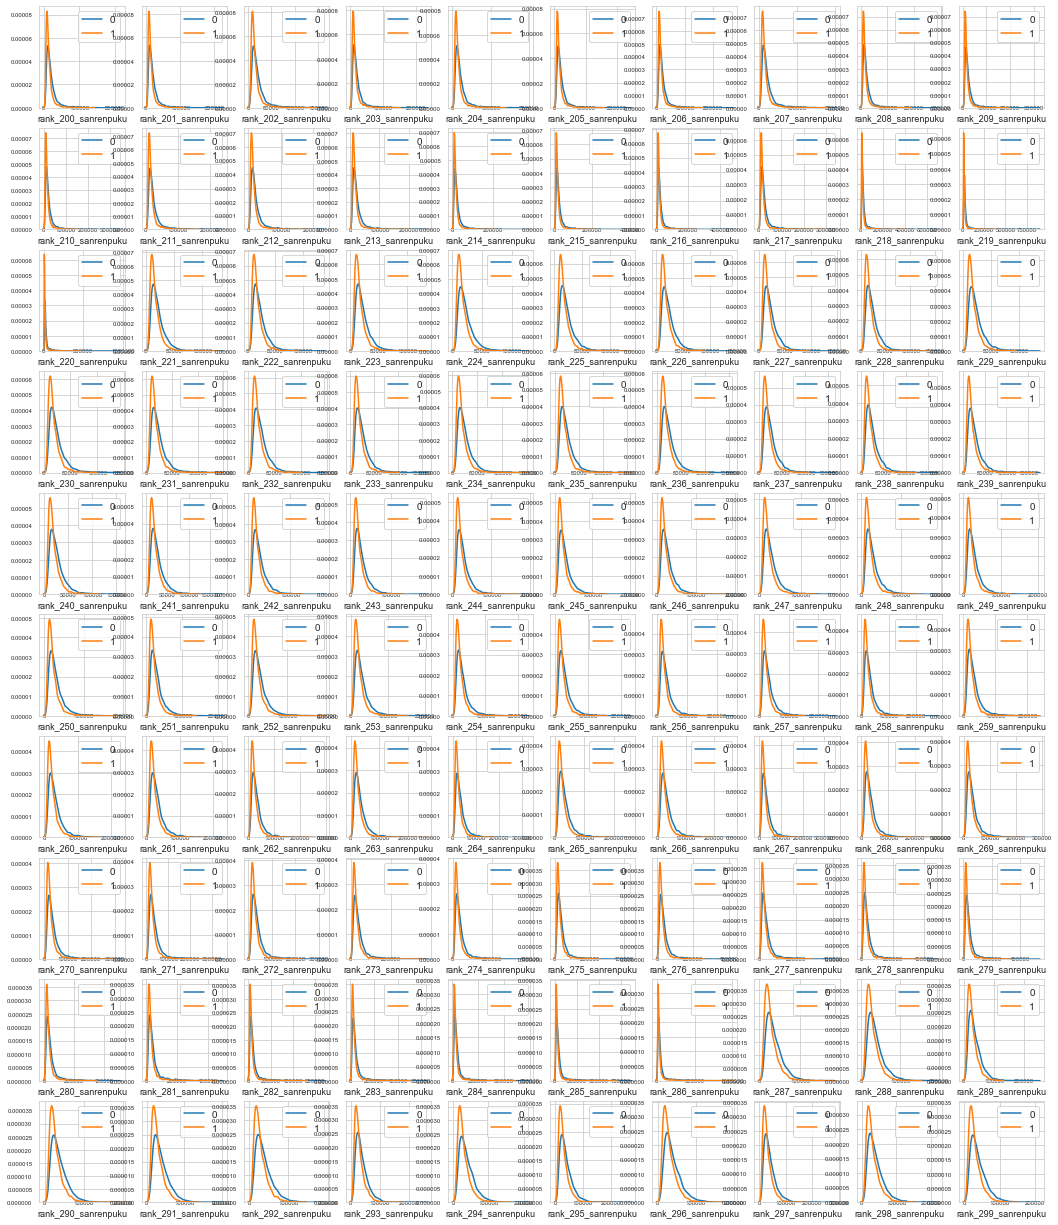

In [36]:
t0 = train_df.loc[train_df['manba_flag'] == 0]
t1 = train_df.loc[train_df['manba_flag'] == 1]
features = train_df.columns.values[200:300]
plot_feature_distribution(t0, t1, '0', '1', features)

<Figure size 432x288 with 0 Axes>

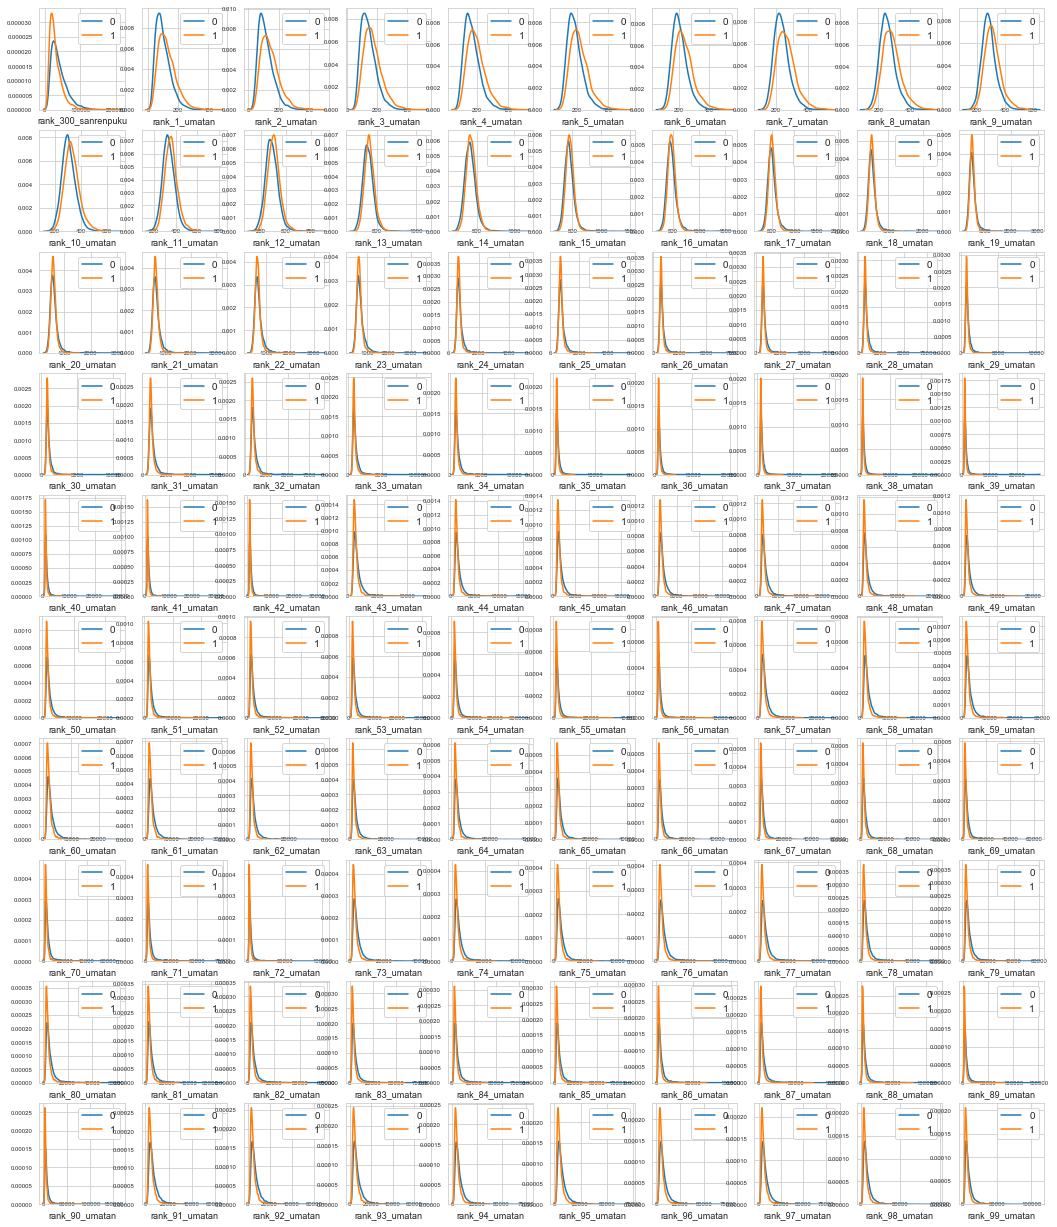

In [37]:
t0 = train_df.loc[train_df['manba_flag'] == 0]
t1 = train_df.loc[train_df['manba_flag'] == 1]
features = train_df.columns.values[300:400]
plot_feature_distribution(t0, t1, '0', '1', features)

<Figure size 432x288 with 0 Axes>

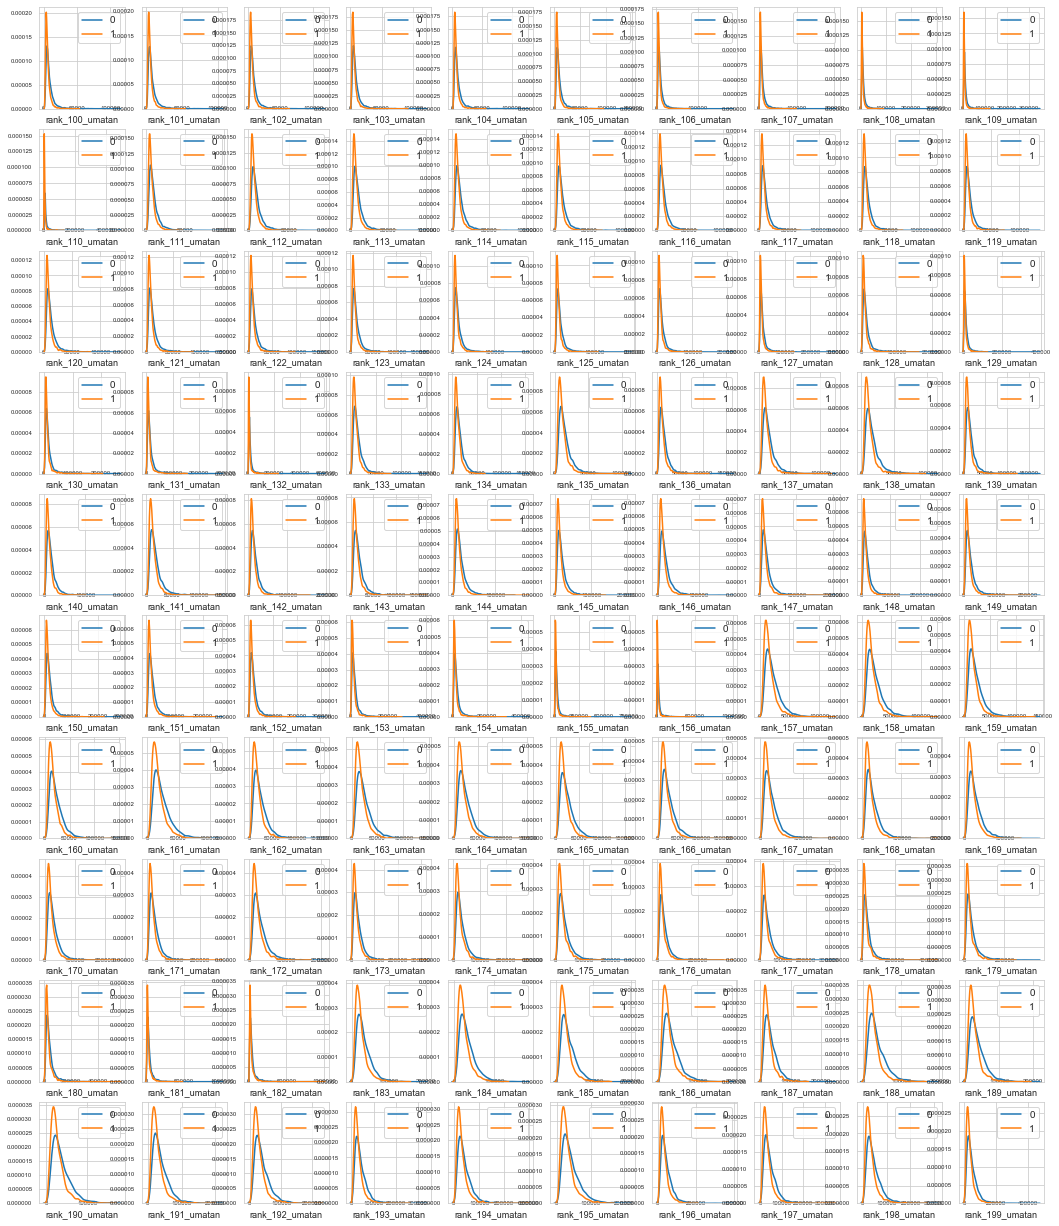

In [38]:
t0 = train_df.loc[train_df['manba_flag'] == 0]
t1 = train_df.loc[train_df['manba_flag'] == 1]
features = train_df.columns.values[400:500]
plot_feature_distribution(t0, t1, '0', '1', features)

<Figure size 432x288 with 0 Axes>

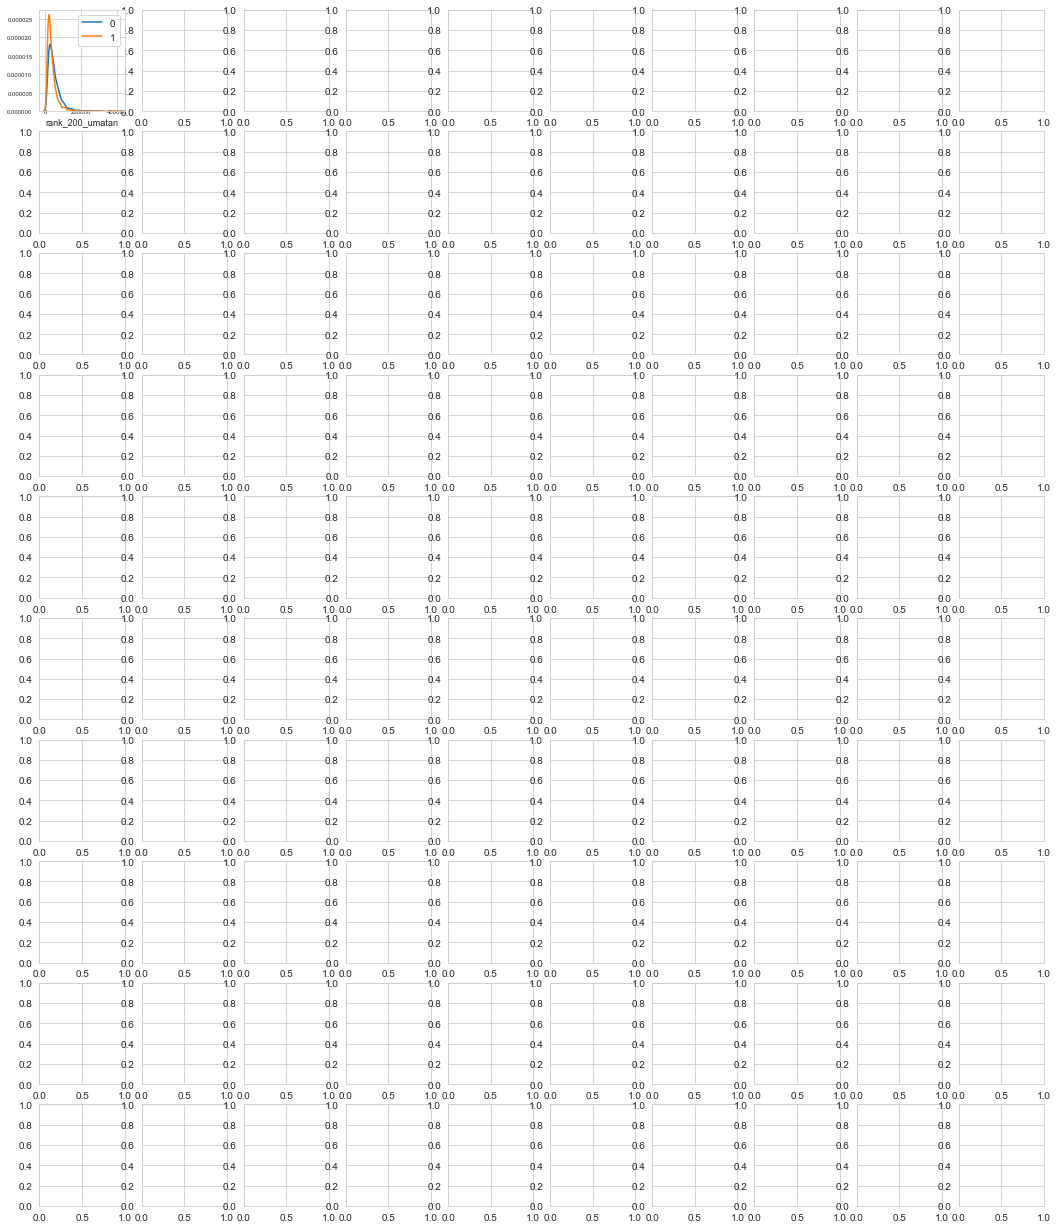

In [39]:
t0 = train_df.loc[train_df['manba_flag'] == 0]
t1 = train_df.loc[train_df['manba_flag'] == 1]
features = train_df.columns.values[500:600]
plot_feature_distribution(t0, t1, '0', '1', features)

In [40]:
train_df.describe()

,manba_flag,rank_1_sanrenpuku,rank_2_sanrenpuku,rank_3_sanrenpuku,rank_4_sanrenpuku,rank_5_sanrenpuku,rank_6_sanrenpuku,rank_7_sanrenpuku,rank_8_sanrenpuku,rank_9_sanrenpuku,rank_10_sanrenpuku,rank_11_sanrenpuku,rank_12_sanrenpuku,rank_13_sanrenpuku,rank_14_sanrenpuku,rank_15_sanrenpuku,rank_16_sanrenpuku,rank_17_sanrenpuku,rank_18_sanrenpuku,rank_19_sanrenpuku,rank_20_sanrenpuku,rank_21_sanrenpuku,rank_22_sanrenpuku,rank_23_sanrenpuku,rank_24_sanrenpuku,...,rank_176_umatan,rank_177_umatan,rank_178_umatan,rank_179_umatan,rank_180_umatan,rank_181_umatan,rank_182_umatan,rank_183_umatan,rank_184_umatan,rank_185_umatan,rank_186_umatan,rank_187_umatan,rank_188_umatan,rank_189_umatan,rank_190_umatan,rank_191_umatan,rank_192_umatan,rank_193_umatan,rank_194_umatan,rank_195_umatan,rank_196_umatan,rank_197_umatan,rank_198_umatan,rank_199_umatan,rank_200_umatan
count,11944.000000,11944.000000,11944.000000,11943.000000,11944.000000,11942.000000,11942.000000,11942.000000,11937.000000,11944.000000,11942.000000,11930.000000,11928.000000,11929.000000,11925.000000,11927.000000,11923.000000,11931.000000,11918.000000,11927.000000,11921.000000,11884.000000,11882.000000,11885.000000,11889.000000,...,6347.000000,6294.000000,6266.000000,6271.000000,6307.000000,6277.000000,6260.000000,5246.000000,5232.000000,5124.000000,5209.000000,5172.000000,5188.000000,5073.000000,5167.000000,5072.000000,5052.00000,5040.000000,5033.000000,5057.000000,5066.000000,4963.000000,4950.000000,4994.000000,4985.000000
mean,0.343436,120.094859,156.959478,182.652097,213.883456,242.494306,269.813432,297.318958,324.268996,349.920881,376.122090,405.250293,432.468729,459.817755,487.429015,515.551270,544.583410,574.418825,604.246350,634.650122,665.997232,696.626136,728.775122,761.923096,795.861384,...,31080.292264,32194.181125,33329.874561,35184.358794,37267.316949,40656.279911,44058.050479,29647.324438,29921.339067,30359.948673,31429.504127,31938.790603,32817.815921,33357.897891,33714.534933,34571.099172,35378.75574,36664.594246,37293.309160,38139.482302,39077.728977,40199.065686,41212.465253,42411.907289,43679.523370
std,0.474875,62.340540,69.066965,73.033329,76.074345,79.534178,81.366446,83.114261,84.442451,85.852475,87.292153,88.358390,90.111551,91.803552,93.435239,95.485824,97.829685,101.853246,107.167065,112.056111,118.804589,120.353726,128.613623,139.510924,151.836429,...,24670.304615,25659.618503,28314.139477,30402.445367,36097.484377,45069.547421,53975.366550,18687.405134,18691.821628,18920.377776,20112.549795,20592.833731,21115.652321,21628.369204,21543.725210,22549.096819,23045.38502,24937.511706,25069.833808,25243.996598,26731.384910,27730.392342,29368.425432,30561.308662,31492.832582
min,0.000000,11.000000,24.000000,35.000000,54.000000,74.000000,81.000000,123.000000,125.000000,147.000000,158.000000,183.000000,188.000000,196.000000,209.000000,228.000000,239.000000,242.000000,244.000000,283.000000,305.000000,379.000000,388.000000,409.000000,432.000000,...,4673.000000,4229.000000,4260.000000,5182.000000,4307.000000,4322.000000,0.000000,4504.000000,4683.000000,4720.000000,4739.000000,4876.000000,5000.000000,5086.000000,5153.000000,5198.000000,5221.00000,5292.000000,5364.000000,6198.000000,5438.000000,5540.000000,5871.000000,5960.000000,5976.000000
25%,0.000000,76.000000,108.000000,131.000000,160.000000,187.000000,212.000000,239.000000,266.000000,291.000000,316.000000,344.000000,371.000000,397.000000,425.000000,451.000000,480.000000,509.000000,537.000000,565.000000,593.000000,622.000000,651.000000,679.000000,709.000000,...,15507.500000,15821.000000,16020.000000,16516.000000,16930.500000,17149.000000,17461.750000,16433.750000,16770.750000,16920.250000,17369.000000,17655.000000,18074.750000,18275.000000,18690.500000,19045.750000,19412.75000,19829.750000,20133.000000,20586.000000,20917.500000,21364.000000,21544.000000,22211.000000,22697.000000
50%,0.000000,109.000000,146.000000,170.000000,201.000000,228.000000,256.000000,285.000000,311.000000,338.000000,364.000000,394.000000

# Feature Enginnering & Fillana

In [316]:
#from sklearn.preprocessing import PolynomialFeatures

In [17]:
train_df = train
test_df = X_test
target = y_train
features = [c for c in train.columns if c not in ['manba_flag']]

In [42]:
gc.collect()

179305

# FeatureTools

In [43]:
import featuretools

In [ ]:
es = ft.EntitySet(id='demodat')

# 特徴量削減

In [19]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

In [62]:
boruta_X_train = X_train
boruta_X_test = X_test

In [64]:
boruta_X_train = boruta_X_train.fillna(-99999)
boruta_X_test = boruta_X_test.fillna(-99999)

In [28]:
# RandomForestmodel
model = RandomForestClassifier(
    n_estimators=50
    , max_depth = 7
    , max_features = 'sqrt'
    , n_jobs=-1
    , verbose=True
    , random_state=42
    )

In [29]:
feat_selector = BorutaPy(model, 
                         n_estimators='auto',  # 特徴量の数に比例して、木の本数を増やす
                         verbose=2, # 0: no output,1: displays iteration number,2: which features have been selected already
                         alpha=0.05, # 有意水準
                         max_iter=50, # 試行回数
                         random_state=42
                        )
feat_selector.fit(boruta_X_train.values, boruta_y_train.values)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done 676 out of 676 | elapsed:  1.2min finished


Iteration: 	1 / 50
Confirmed: 	0
Tentative: 	1122
Rejected: 	0


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 676 out of 676 | elapsed:   53.9s finished


Iteration: 	2 / 50
Confirmed: 	0
Tentative: 	1122
Rejected: 	0


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 676 out of 676 | elapsed:   44.9s finished


Iteration: 	3 / 50
Confirmed: 	0
Tentative: 	1122
Rejected: 	0


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 676 out of 676 | elapsed:   40.9s finished


Iteration: 	4 / 50
Confirmed: 	0
Tentative: 	1122
Rejected: 	0


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 676 out of 676 | elapsed:   36.8s finished


Iteration: 	5 / 50
Confirmed: 	0
Tentative: 	1122
Rejected: 	0


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 676 out of 676 | elapsed:   40.6s finished


Iteration: 	6 / 50
Confirmed: 	0
Tentative: 	1122
Rejected: 	0


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 676 out of 676 | elapsed:   31.1s finished


Iteration: 	7 / 50
Confirmed: 	0
Tentative: 	1122
Rejected: 	0


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 676 out of 676 | elapsed:   30.7s finished


Iteration: 	8 / 50
Confirmed: 	197
Tentative: 	187
Rejected: 	738


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 395 out of 395 | elapsed:   17.6s finished


Iteration: 	9 / 50
Confirmed: 	197
Tentative: 	187
Rejected: 	738


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 395 out of 395 | elapsed:   17.5s finished


Iteration: 	10 / 50
Confirmed: 	197
Tentative: 	187
Rejected: 	738


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 395 out of 395 | elapsed:   29.3s finished


Iteration: 	11 / 50
Confirmed: 	197
Tentative: 	187
Rejected: 	738


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 395 out of 395 | elapsed:   32.3s finished


Iteration: 	12 / 50
Confirmed: 	200
Tentative: 	149
Rejected: 	773


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 377 out of 377 | elapsed:   29.1s finished


Iteration: 	13 / 50
Confirmed: 	200
Tentative: 	149
Rejected: 	773


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 377 out of 377 | elapsed:   29.3s finished


Iteration: 	14 / 50
Confirmed: 	200
Tentative: 	149
Rejected: 	773


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 377 out of 377 | elapsed:   28.7s finished


Iteration: 	15 / 50
Confirmed: 	200
Tentative: 	149
Rejected: 	773


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 377 out of 377 | elapsed:   28.8s finished


Iteration: 	16 / 50
Confirmed: 	200
Tentative: 	125
Rejected: 	797


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 364 out of 364 | elapsed:   27.3s finished


Iteration: 	17 / 50
Confirmed: 	200
Tentative: 	125
Rejected: 	797


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 364 out of 364 | elapsed:   28.6s finished


Iteration: 	18 / 50
Confirmed: 	200
Tentative: 	125
Rejected: 	797


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 364 out of 364 | elapsed:   28.1s finished


Iteration: 	19 / 50
Confirmed: 	200
Tentative: 	107
Rejected: 	815


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 353 out of 353 | elapsed:   27.3s finished


Iteration: 	20 / 50
Confirmed: 	200
Tentative: 	107
Rejected: 	815


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 353 out of 353 | elapsed:   23.6s finished


Iteration: 	21 / 50
Confirmed: 	200
Tentative: 	107
Rejected: 	815


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 353 out of 353 | elapsed:   26.3s finished


Iteration: 	22 / 50
Confirmed: 	200
Tentative: 	93
Rejected: 	829


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 345 out of 345 | elapsed:   24.5s finished


Iteration: 	23 / 50
Confirmed: 	200
Tentative: 	93
Rejected: 	829


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 345 out of 345 | elapsed:   21.6s finished


Iteration: 	24 / 50
Confirmed: 	200
Tentative: 	93
Rejected: 	829


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 345 out of 345 | elapsed:   22.5s finished


Iteration: 	25 / 50
Confirmed: 	200
Tentative: 	93
Rejected: 	829


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 345 out of 345 | elapsed:   27.9s finished


Iteration: 	26 / 50
Confirmed: 	200
Tentative: 	72
Rejected: 	850


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 333 out of 333 | elapsed:   37.5s finished


Iteration: 	27 / 50
Confirmed: 	200
Tentative: 	72
Rejected: 	850


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 333 out of 333 | elapsed:   26.0s finished


Iteration: 	28 / 50
Confirmed: 	200
Tentative: 	72
Rejected: 	850


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 333 out of 333 | elapsed:   22.3s finished


Iteration: 	29 / 50
Confirmed: 	200
Tentative: 	61
Rejected: 	861


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 326 out of 326 | elapsed:   20.9s finished


Iteration: 	30 / 50
Confirmed: 	200
Tentative: 	61
Rejected: 	861


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 326 out of 326 | elapsed:   20.2s finished


Iteration: 	31 / 50
Confirmed: 	200
Tentative: 	61
Rejected: 	861


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 326 out of 326 | elapsed:   21.6s finished


Iteration: 	32 / 50
Confirmed: 	200
Tentative: 	50
Rejected: 	872


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 319 out of 319 | elapsed:   21.7s finished


Iteration: 	33 / 50
Confirmed: 	200
Tentative: 	50
Rejected: 	872


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 319 out of 319 | elapsed:   23.0s finished


Iteration: 	34 / 50
Confirmed: 	200
Tentative: 	50
Rejected: 	872


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 319 out of 319 | elapsed:   20.9s finished


Iteration: 	35 / 50
Confirmed: 	200
Tentative: 	44
Rejected: 	878


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 315 out of 315 | elapsed:   21.8s finished


Iteration: 	36 / 50
Confirmed: 	200
Tentative: 	44
Rejected: 	878


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 315 out of 315 | elapsed:   21.1s finished


Iteration: 	37 / 50
Confirmed: 	200
Tentative: 	35
Rejected: 	887


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 309 out of 309 | elapsed:   20.9s finished


Iteration: 	38 / 50
Confirmed: 	200
Tentative: 	35
Rejected: 	887


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 309 out of 309 | elapsed:   19.7s finished


Iteration: 	39 / 50
Confirmed: 	200
Tentative: 	35
Rejected: 	887


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 309 out of 309 | elapsed:   20.6s finished


Iteration: 	40 / 50
Confirmed: 	200
Tentative: 	32
Rejected: 	890


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 307 out of 307 | elapsed:   20.4s finished


Iteration: 	41 / 50
Confirmed: 	200
Tentative: 	32
Rejected: 	890


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 307 out of 307 | elapsed:   19.6s finished


Iteration: 	42 / 50
Confirmed: 	200
Tentative: 	32
Rejected: 	890


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 307 out of 307 | elapsed:   20.2s finished


Iteration: 	43 / 50
Confirmed: 	200
Tentative: 	27
Rejected: 	895


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 304 out of 304 | elapsed:   21.3s finished


Iteration: 	44 / 50
Confirmed: 	200
Tentative: 	27
Rejected: 	895


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 304 out of 304 | elapsed:   21.0s finished


Iteration: 	45 / 50
Confirmed: 	200
Tentative: 	27
Rejected: 	895


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 304 out of 304 | elapsed:   21.0s finished


Iteration: 	46 / 50
Confirmed: 	200
Tentative: 	24
Rejected: 	898


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 302 out of 302 | elapsed:   21.3s finished


Iteration: 	47 / 50
Confirmed: 	200
Tentative: 	24
Rejected: 	898


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 302 out of 302 | elapsed:   23.2s finished


Iteration: 	48 / 50
Confirmed: 	200
Tentative: 	24
Rejected: 	898


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 302 out of 302 | elapsed:   21.0s finished


Iteration: 	49 / 50
Confirmed: 	200
Tentative: 	22
Rejected: 	900


BorutaPy finished running.

Iteration: 	50 / 50
Confirmed: 	200
Tentative: 	1
Rejected: 	900


BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                          criterion='gini', max_depth=7,
                                          max_features='sqrt',
                                          max_leaf_nodes=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=302, n_jobs=-1,
                                          oob_score=False,
                                          random_state=<mtrand.RandomState object at 0x1a23fe7558>,
                                          verbose=True, warm_start=False),
         max_iter=50, n_estimators='auto', perc=100,
         ran

In [65]:
X_train_selected = boruta_X_train.iloc[:,feat_selector.support_]
X_test_selected = boruta_X_test.iloc[:,feat_selector.support_]

In [70]:
X_train_selected.to_csv("X_train_selected.csv")
X_test_selected.to_csv("X_test_selected.csv")
y_train.to_csv("y_train.csv")
y_test.to_csv("y_test.csv")

/Users/k17099kk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/k17099kk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.


In [66]:
X_train_selected.columns

Index(['rank_1_sanrenpuku', 'rank_2_sanrenpuku', 'rank_3_sanrenpuku',
       'rank_4_sanrenpuku', 'rank_5_sanrenpuku', 'rank_6_sanrenpuku',
       'rank_7_sanrenpuku', 'rank_8_sanrenpuku', 'rank_9_sanrenpuku',
       'rank_10_sanrenpuku',
       ...
       'rank_87_umatan', 'rank_88_umatan', 'rank_89_umatan', 'rank_90_umatan',
       'rank_94_umatan', 'rank_98_umatan', 'rank_107_umatan',
       'rank_108_umatan', 'rank_109_umatan', 'rank_124_umatan'],
      dtype='object', length=200)

In [67]:
X_test_selected.columns

Index(['rank_1_sanrenpuku', 'rank_2_sanrenpuku', 'rank_3_sanrenpuku',
       'rank_4_sanrenpuku', 'rank_5_sanrenpuku', 'rank_6_sanrenpuku',
       'rank_7_sanrenpuku', 'rank_8_sanrenpuku', 'rank_9_sanrenpuku',
       'rank_10_sanrenpuku',
       ...
       'rank_87_umatan', 'rank_88_umatan', 'rank_89_umatan', 'rank_90_umatan',
       'rank_94_umatan', 'rank_98_umatan', 'rank_107_umatan',
       'rank_108_umatan', 'rank_109_umatan', 'rank_124_umatan'],
      dtype='object', length=200)

In [68]:
train_df = X_train_selected
test_df = X_test_selected
target = y_train
features = [c for c in X_train_selected.columns if c not in ['manba_flag']]

In [69]:
folds = StratifiedKFold(n_splits=8, shuffle=False, random_state=44000)
oof = np.zeros(len(train_df))
predictions = np.zeros(len(test_df))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(train_df.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train_df.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 100000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=200, early_stopping_rounds = 1000)
    oof[val_idx] = clf.predict(train_df.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test_df[features], num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))

Fold 0
Training until validation scores don't improve for 1000 rounds.
[200]	training's auc: 0.733035	valid_1's auc: 0.679358
[400]	training's auc: 0.750425	valid_1's auc: 0.679523
[600]	training's auc: 0.769298	valid_1's auc: 0.680087
[800]	training's auc: 0.784888	valid_1's auc: 0.67906
[1000]	training's auc: 0.802059	valid_1's auc: 0.679392
[1200]	training's auc: 0.815613	valid_1's auc: 0.678877
Early stopping, best iteration is:
[336]	training's auc: 0.74458	valid_1's auc: 0.680681
Fold 1
Training until validation scores don't improve for 1000 rounds.
[200]	training's auc: 0.726832	valid_1's auc: 0.730619
[400]	training's auc: 0.745003	valid_1's auc: 0.730658
[600]	training's auc: 0.764616	valid_1's auc: 0.729037
[800]	training's auc: 0.781934	valid_1's auc: 0.729202
[1000]	training's auc: 0.798836	valid_1's auc: 0.727235
[1200]	training's auc: 0.812518	valid_1's auc: 0.726565
Early stopping, best iteration is:
[305]	training's auc: 0.736183	valid_1's auc: 0.731403
Fold 2
Training 

In [ ]:
#-99999で埋める
train_df = train_df.fillna(-99999)
test_df = test_df.fillna(-99999)

# 次元削減

In [ ]:
from sklearn.decomposition import NMF

#NMFで訓練
nmf = NMF(n_components=200, random_state=42)
train_nmf = nmf.fit_transform(train_df)
test_nmf = nmf.fit_transform(test_df)

In [45]:
#データ全体についての統計量を特徴量として追加　
idx_all = features = train_df.columns.values[1:501]
for df in [test_df, train_df]:
    df['sum'] = df[idx_all].sum(axis=1)  
    df['min'] = df[idx_all].min(axis=1)
    df['max'] = df[idx_all].max(axis=1)
    df['mean'] = df[idx_all].mean(axis=1)
    df['std'] = df[idx_all].std(axis=1)
    df['skew'] = df[idx_all].skew(axis=1)
    df['kurt'] = df[idx_all].kurtosis(axis=1)
    df['med'] = df[idx_all].median(axis=1)
    df['is_null'] = df[idx_all].isnull().sum(axis=1)

/Users/k17099kk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/k17099kk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/k17099kk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [46]:
#三連複300位までの統計量を特徴量として追加 →　全部
idx_sanren = features = train_df.columns.values[1:301] 
for df in [test_df, train_df]:
    df['sanren_sum'] = df[idx_sanren].sum(axis=1)  
    df['sanren_min'] = df[idx_sanren].min(axis=1)
    df['sanren_max'] = df[idx_sanren].max(axis=1)
    df['sanren_mean'] = df[idx_sanren].mean(axis=1)
    df['sanren_std'] = df[idx_sanren].std(axis=1)
    df['sanren_skew'] = df[idx_sanren].skew(axis=1)
    df['sanren_kurt'] = df[idx_sanren].kurtosis(axis=1)
    df['sanren_med'] = df[idx_sanren].median(axis=1)
    df['sanren_is_null'] = df[idx_sanren].isnull().sum(axis=1)

/Users/k17099kk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/k17099kk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/k17099kk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [47]:
#馬単200位までの統計量を特徴量として追加
idx_umatan = features = train_df.columns.values[301:501]
for df in [test_df, train_df]:
    df['umatan_sum'] = df[idx_umatan].sum(axis=1)  
    df['umatan_min'] = df[idx_umatan].min(axis=1)
    df['umatan_max'] = df[idx_umatan].max(axis=1)
    df['umatan_mean'] = df[idx_umatan].mean(axis=1)
    df['umatan_std'] = df[idx_umatan].std(axis=1)
    df['umatan_skew'] = df[idx_umatan].skew(axis=1)
    df['umatan_kurt'] = df[idx_umatan].kurtosis(axis=1)
    df['umatan_med'] = df[idx_umatan].median(axis=1)
    df['umatan_is_null'] = df[idx_umatan].isnull().sum(axis=1)
    

/Users/k17099kk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/k17099kk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/k17099kk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [51]:
#-99999で埋める
train_df = train_df.fillna(-99999)
test_df = test_df.fillna(-99999)

In [48]:
train_df.head()

,manba_flag,rank_1_sanrenpuku,rank_2_sanrenpuku,rank_3_sanrenpuku,rank_4_sanrenpuku,rank_5_sanrenpuku,rank_6_sanrenpuku,rank_7_sanrenpuku,rank_8_sanrenpuku,rank_9_sanrenpuku,rank_10_sanrenpuku,rank_11_sanrenpuku,rank_12_sanrenpuku,rank_13_sanrenpuku,rank_14_sanrenpuku,rank_15_sanrenpuku,rank_16_sanrenpuku,rank_17_sanrenpuku,rank_18_sanrenpuku,rank_19_sanrenpuku,rank_20_sanrenpuku,rank_21_sanrenpuku,rank_22_sanrenpuku,rank_23_sanrenpuku,rank_24_sanrenpuku,...,max,mean,std,skew,kurt,med,is_null,sanren_sum,sanren_min,sanren_max,sanren_mean,sanren_std,sanren_skew,sanren_kurt,sanren_med,sanren_is_null,umatan_sum,umatan_min,umatan_max,umatan_mean,umatan_std,umatan_skew,umatan_kurt,umatan_med,umatan_is_null
13882,0,53,74,79.0,128,339.0,348.0,376.0,376.0,400,411.0,416.0,440.0,455.0,480.0,482.0,484.0,540.0,546.0,730.0,740.0,771.0,835.0,846.0,871.0,...,73401.0,18399.579545,18948.016399,1.104500,0.197055,10724.5,60,5259494.0,53.0,73401.0,19847.147170,19442.727376,0.999535,-0.079364,13547.0,35,2836321.0,93.0,71538.0,16207.548571,18006.965304,1.291826,0.793769,8484.0,25
2727,0,173,228,278.0,320,331.0,334.0,344.0,345.0,378,387.0,403.0,457.0,521.0,526.0,543.0,549.0,605.0,632.0,644.0,649.0,690.0,707.0,775.0,779.0,...,20293.0,6338.169231,5429.797237,0.860174,-0.287273,4716.0,45,1890224.0,173.0,19879.0,7000.829630,5538.541362,0.699361,-0.597869,5791.5,30,993643.0,200.0,20293.0,5371.043243,5129.758033,1.149756,0.496502,3762.0,15
3964,0,86,89,125.0,128,165.0,195.0,199.0,213.0,213,221.0,260.0,281.0,334.0,371.0,401.0,495.0,558.0,762.0,765.0,771.0,823.0,839.0,902.0,1023.0,...,349017.0,31680.074627,50279.862723,2.955397,10.764382,10486.0,98,9811719.0,86.0,349017.0,39090.513944,58222.946272,2.578804,7.668202,13834.0,49,2923671.0,57.0,159559.0,19362.059603,29391.689266,2.604533,7.395162,8433.0,49
6896,0,103,129,134.0,144,145.0,173.0,237.0,239.0,265,277.0,280.0,297.0,378.0,456.0,480.0,506.0,561.0,568.0,575.0,577.0,676.0,725.0,828.0,880.0,...,106220.0,17456.174713,20151.358390,1.709398,2.867545,9552.0,65,4527275.0,103.0,63958.0,16956.086142,17087.140285,1.128685,0.260705,10321.0,33,3066161.0,80.0,106220.0,18250.958333,24273.949425,1.880454,2.862196,8986.5,32
10783,1,81,129,149.0,162,180.0,185.0,217.0,288.0,301,324.0,379.0,382.0,398.0,458.0,465.0,539.0,568.0,571.0,592.0,644.0,680.0,685.0,699.0,708.0,...,200570.0,17979.140811,25812.025292,3.241399,14.805018,8636.0,81,4009510.0,81.0,66677.0,15785.472441,16832.683835,1.237782,0.547320,8973.0,46,3523750.0,65.0,200570.0,21356.060606,35243.771003,2.835753,8.893342,7398.0,35


row CV score: 0.67489 

In [44]:
train_df = X_train_selected
test_df = 
target = y_train
features = [c for c in X_train_selected.columns if c not in ['manba_flag']]

In [45]:
folds = StratifiedKFold(n_splits=8, shuffle=False, random_state=44000)
oof = np.zeros(len(train_df))
predictions = np.zeros(len(test_df))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(train_df.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train_df.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 100000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=200, early_stopping_rounds = 1000)
    oof[val_idx] = clf.predict(train_df.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test_df[features], num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))

Fold 0
Training until validation scores don't improve for 1000 rounds.
[200]	training's auc: 0.735367	valid_1's auc: 0.678655
[400]	training's auc: 0.753615	valid_1's auc: 0.677904
[600]	training's auc: 0.773169	valid_1's auc: 0.676888
[800]	training's auc: 0.789364	valid_1's auc: 0.676485
[1000]	training's auc: 0.80623	valid_1's auc: 0.67684
[1200]	training's auc: 0.819558	valid_1's auc: 0.67721
Early stopping, best iteration is:
[231]	training's auc: 0.738221	valid_1's auc: 0.679342


KeyError: "['rank_52_umatan', 'rank_63_umatan', 'rank_84_umatan', 'rank_7_umatan', 'rank_78_umatan', 'rank_88_umatan', 'rank_9_umatan', 'rank_89_umatan', 'rank_98_umatan', 'rank_83_umatan', 'rank_50_umatan', 'rank_67_umatan', 'rank_12_umatan', 'rank_53_umatan', 'rank_51_umatan', 'rank_56_umatan', 'rank_55_umatan', 'rank_71_umatan', 'rank_64_umatan', 'rank_124_umatan', 'rank_8_umatan', 'rank_74_umatan', 'rank_6_umatan', 'rank_81_umatan', 'rank_69_umatan', 'rank_79_umatan', 'rank_82_umatan', 'rank_66_umatan', 'rank_75_umatan', 'rank_80_umatan', 'rank_48_umatan', 'rank_2_umatan', 'rank_94_umatan', 'rank_65_umatan', 'rank_68_umatan', 'rank_54_umatan', 'rank_49_umatan', 'rank_72_umatan', 'rank_4_umatan', 'rank_107_umatan', 'rank_3_umatan', 'rank_61_umatan', 'rank_5_umatan', 'rank_76_umatan', 'rank_70_umatan', 'rank_87_umatan', 'rank_90_umatan', 'rank_10_umatan', 'rank_73_umatan', 'rank_11_umatan'] not in index"

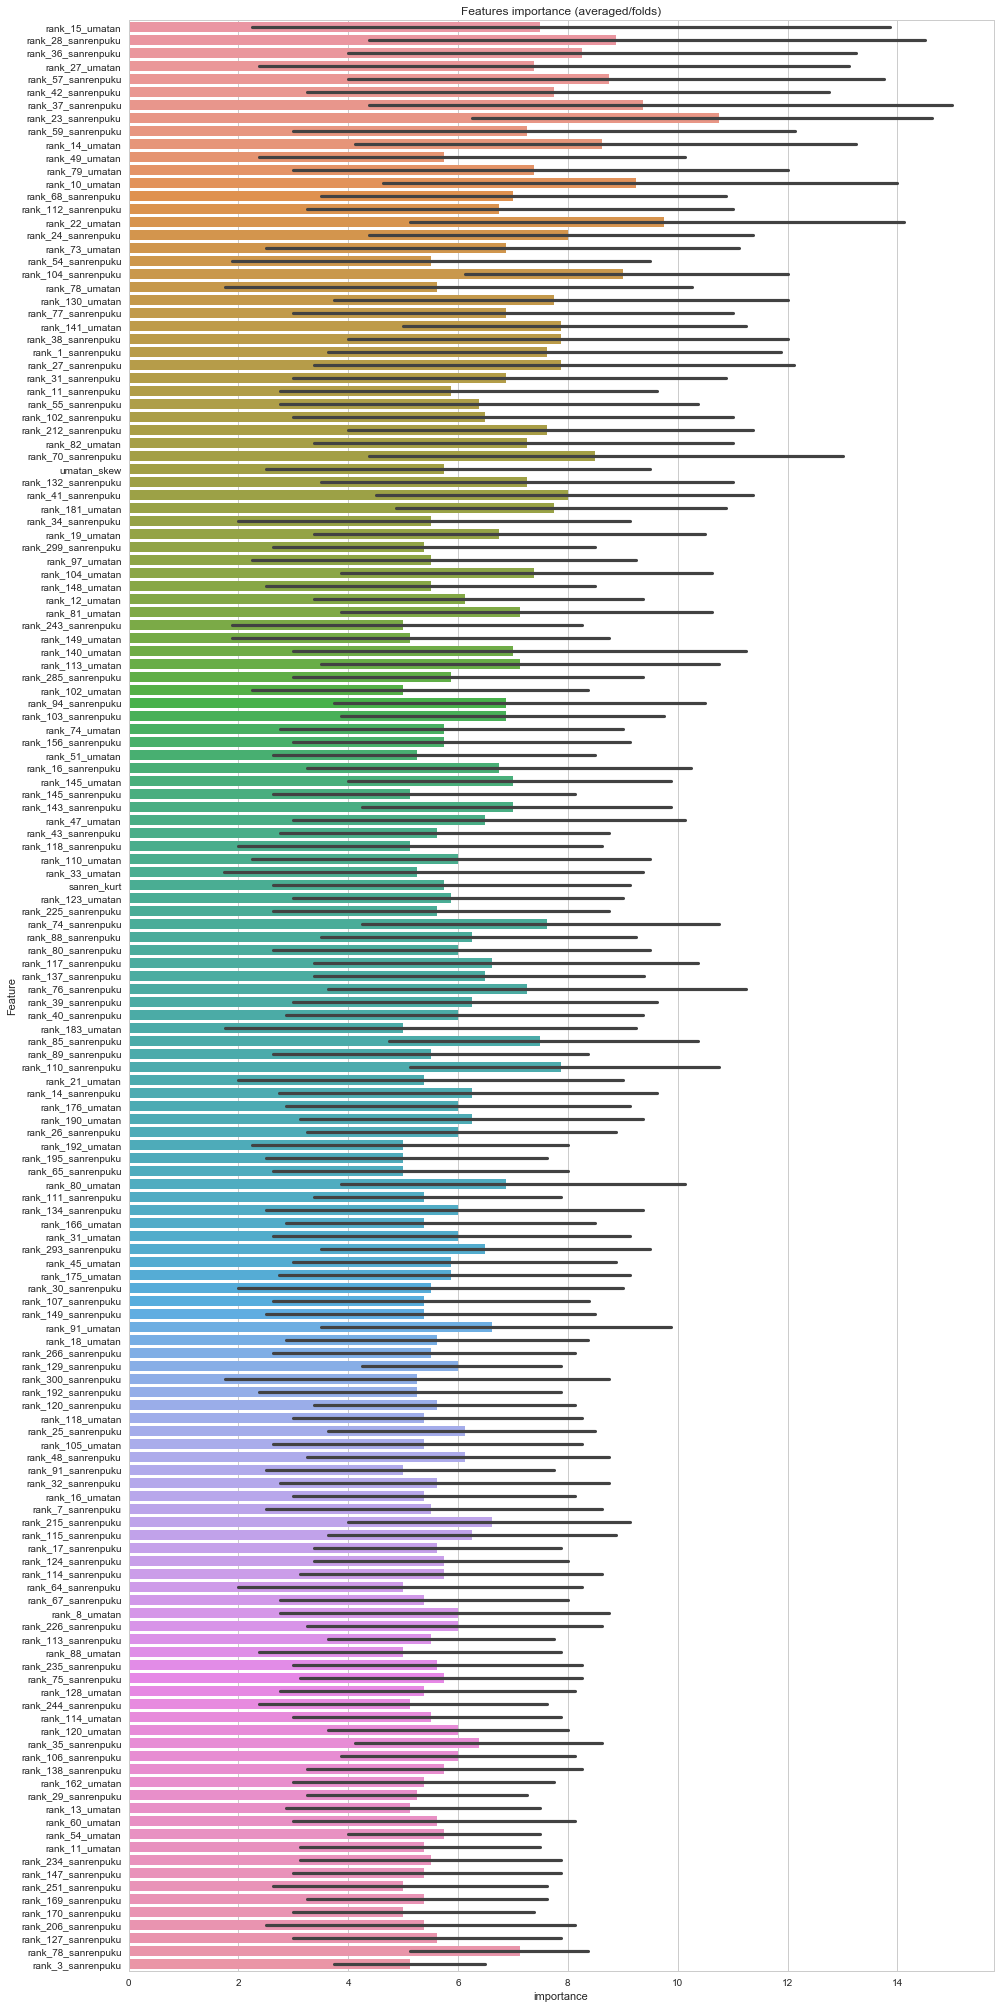

In [311]:
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:150].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(14,28))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()
#plt.savefig('FI_FE.png')

In [313]:
train_corr_matrix = train_df.corr().abs()
train_manba_corr = train_corr_matrix['manba_flag']

In [314]:
train_manba_corr_sorted = train_manba_corr.sort_values(ascending=False)
train_manba_corr_sorted[1:50]

rank_4_sanrenpuku      0.298454
rank_5_sanrenpuku      0.296282
rank_3_sanrenpuku      0.294205
rank_2_sanrenpuku      0.290280
rank_6_sanrenpuku      0.289348
rank_7_sanrenpuku      0.286738
rank_8_sanrenpuku      0.283415
sanren_min             0.280560
rank_1_sanrenpuku      0.280560
rank_9_sanrenpuku      0.276446
rank_10_sanrenpuku     0.271424
rank_7_umatan          0.264601
rank_4_umatan          0.263082
rank_6_umatan          0.263032
rank_11_sanrenpuku     0.262492
umatan_is_null         0.260955
rank_5_umatan          0.260376
rank_8_umatan          0.258449
is_null                0.258126
rank_3_umatan          0.258056
min                    0.255589
sanren_is_null         0.253884
rank_2_umatan          0.248203
rank_12_sanrenpuku     0.244157
rank_9_umatan          0.239596
rank_291_sanrenpuku    0.238267
umatan_min             0.236678
rank_1_umatan          0.236625
rank_299_sanrenpuku    0.234932
rank_288_sanrenpuku    0.233608
rank_224_sanrenpuku    0.233215
rank_185

In [242]:
#train_manba_corr_sorted['umatan_kurt']

0.08079904629762077